In [5]:
# libraries 
import numpy as np
import pandas as pd
# matplotlib
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns
# sklearn

# biomart
from biomart import BiomartServer


In [6]:
# Download the results 

## DE
de_example = pd.read_csv('DE/GSE214615_signatureData.csv')
de_example.head()


,Ensembl_ID,Gene_symbol,Log_FoldChange,logCPM,PValue,FDR_adjusted_P.value,Power,BCOV,minusPadj
0,ENSMUSG00000034957,Cebpa,-9.260,7.239,1.780000e-95,2.460000e-91,1.0,0.251,90.608331
1,ENSMUSG00000051748,Wfdc21,-5.620,6.176,6.110000e-76,4.220000e-72,1.0,0.205,71.374282
2,ENSMUSG00000024029,Tff3,4.262,4.226,9.790000e-54,4.520000e-50,1.0,0.191,49.345284
3,ENSMUSG00000029304,Spp1,5.531,7.626,6.810000e-50,2.360000e-46,1.0,0.258,45.627981
4,ENSMUSG00000074923,Pak6,8.618,1.980,1.310000e-35,3.620000e-32,1.0,0.295,31.441689


In [8]:
# -log adj.pvalue 
de_example['-log adj.pvalue'] = -np.log10(de_example['FDR_adjusted_P.value'])
# Filter logcpm < 1
de_example = de_example[de_example['logCPM'] >= 1]
# Define thresholds
abs_fc = 1.5  # Replace with your desired threshold for log_Folderchange
threshold = 0.05  # Replace with your desired threshold for -log adj.pvalue

# Add a new column 'color' based on the conditions
de_example['color'] = de_example.apply(
    lambda row: 'red' if row['Log_FoldChange'] < -abs_fc and row['-log adj.pvalue'] > threshold
    else 'blue' if row['Log_FoldChange'] > abs_fc and row['-log adj.pvalue'] > threshold
    else 'white',
    axis=1
)

de_example.head()

/tmp/ipykernel_717687/3168761084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_example['color'] = de_example.apply(


,Ensembl_ID,Gene_symbol,Log_FoldChange,logCPM,PValue,FDR_adjusted_P.value,Power,BCOV,minusPadj,-log adj.pvalue,color
0,ENSMUSG00000034957,Cebpa,-9.260,7.239,1.780000e-95,2.460000e-91,1.0,0.251,90.608331,90.609065,red
1,ENSMUSG00000051748,Wfdc21,-5.620,6.176,6.110000e-76,4.220000e-72,1.0,0.205,71.374282,71.374688,red
2,ENSMUSG00000024029,Tff3,4.262,4.226,9.790000e-54,4.520000e-50,1.0,0.191,49.345284,49.344862,blue
3,ENSMUSG00000029304,Spp1,5.531,7.626,6.810000e-50,2.360000e-46,1.0,0.258,45.627981,45.627088,blue
4,ENSMUSG00000074923,Pak6,8.618,1.980,1.310000e-35,3.620000e-32,1.0,0.295,31.441689,31.441291,blue


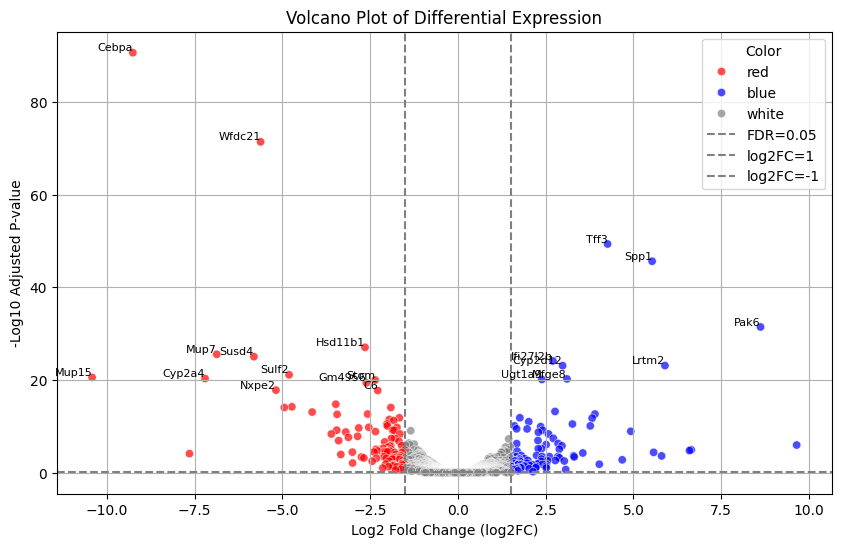

In [9]:
# Select the top 20 points by -log adj.pvalue
top_20 = de_example.nlargest(20, '-log adj.pvalue')

# Volcano plot with points colored by the 'color' column
plt.figure(figsize=(10, 6))
sns.scatterplot(data=de_example, x='Log_FoldChange', y='-log adj.pvalue', hue='color', alpha=0.7, 
                palette={'red': 'red', 'blue': 'blue', 'white': 'gray'})

# Add labels for the top 20 points
for i, row in top_20.iterrows():
    plt.text(row['Log_FoldChange'], row['-log adj.pvalue'], row['Gene_symbol'], 
             fontsize=8, ha='right', va='bottom')

# Optional: Add threshold lines
plt.axhline(y= threshold, color='grey', linestyle='--', label='FDR=0.05')
plt.axvline(x=abs_fc, color='grey', linestyle='--', label='log2FC=1')
plt.axvline(x=-abs_fc, color='grey', linestyle='--', label='log2FC=-1')

plt.title('Volcano Plot of Differential Expression')
plt.xlabel('Log2 Fold Change (log2FC)')
plt.ylabel('-Log10 Adjusted P-value')

plt.legend(title='Color')
plt.grid(True)  
plt.show()

In [ ]:
# Export to HPA 
# Filter color that is not white
de_example_filtered = de_example[de_example['color'] != 'white']
gene_list = de_example_filtered['Ensembl_ID'].tolist() 
# Change character to capital